## Tensorflow basics- Regression

### Tensorflow Regression

In [1]:
#from _future_ import absolute_import, division, print_function
import pathlib

In [2]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.version)

<module 'tensorflow._api.v1.version' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\tensorflow_core\\_api\\v1\\version\\__init__.py'>


#### Import the dataset

In [3]:
dataset_path = r'C:\Users\Administrator\Downloads\ZnDrop_project_2017_2020_dataset.xlsx'

In [19]:
raw_dataset = pd.read_excel(dataset_path)

In [23]:
dataset = raw_dataset.set_index('DATETIME')

#### Clean the data

In [24]:
for col in dataset.columns:
    dataset[col] = pd.to_numeric(dataset[col], errors='coerce')
dataset.interpolate(method='linear', limit_direction = 'forward', inplace=True)


In [30]:
dataset = dataset.dropna()
dataset = dataset.drop(['tk13_Zn', 'tk13_solids%'], axis=1)

In [31]:
dataset.columns

Index(['104_Pb', '104_Zn', '104_Cu', '104_Ni', '104_Co', '104_Fe', '104_Mn',
       '104_Cr', '104_Ca', '104_Si', '104_Al', '104_Mg', '104_Fe2', '104_pH60',
       '104_ORP', '104_NTU', '104_Ft', 'Zn_drop'],
      dtype='object')

#### Split data into train and test

In [32]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

##### Inspect the data

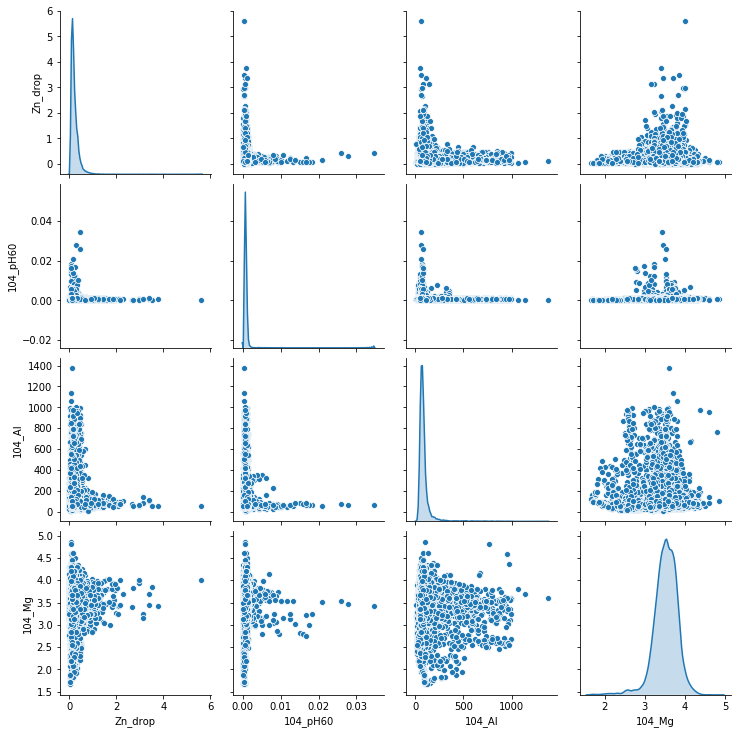

In [33]:
# Have a quick look at the joint distribution of a few pairs from the training set

sns.pairplot(train_dataset[['Zn_drop', '104_pH60', '104_Al', '104_Mg']], diag_kind='kde')

In [34]:
# Also look at the overall statistics:

train_stats = train_dataset.describe()
train_stats.pop('Zn_drop')

count    21663.000000
mean         0.210486
std          0.183384
min          0.000000
25%          0.106500
50%          0.165000
75%          0.264413
max          5.598000
Name: Zn_drop, dtype: float64

In [35]:
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
104_Pb,21663.0,4.040277,0.686684,0.3913,3.529937,4.014000,4.467750,7.0360
104_Zn,21663.0,0.687849,0.041377,0.0000,0.663900,0.686500,0.711137,1.1090
104_Cu,21663.0,0.339392,0.039635,0.1476,0.315300,0.339925,0.363012,0.6541
104_Ni,21663.0,0.134106,0.035210,0.0210,0.114900,0.129200,0.145975,1.4460
104_Co,21663.0,0.016128,0.040826,0.0000,0.013866,0.015500,0.017100,3.8050
104_Fe,21663.0,1.241909,0.465176,0.0687,0.892713,1.213900,1.515000,5.2760
104_Mn,21663.0,1.064441,0.441506,0.0000,0.722000,1.050000,1.329500,4.8200
104_Cr,21663.0,14.001369,22.342104,8.0000,11.000000,12.000000,13.000000,784.0000
104_Ca,21663.0,6.062426,1.709373,0.0407,4.618000,6.009000,7.387250,12.0500
104_Si,21663.0,3.484255,0.311548,0.3626,3.325000,3.497000,3.644625,5.2390


#### Split features from labels

In [36]:
#Separate the target value, or "label", from the features. 
#This label is the value that you will train the model to predict.

train_labels = train_dataset.pop('Zn_drop')
test_labels = test_dataset.pop('Zn_drop')

##### Normalize the data

In [37]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

### The model
#### Build the model

In [38]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [39]:
model = build_model()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


##### Inspect the model

In [40]:
# Use the .summary method to print a simple description of the model

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1152      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,377
Trainable params: 5,377
Non-trainable params: 0
_________________________________________________________________


In [41]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result
# the array should display 10 values representing the MPG predictions

array([[ 0.00948836],
       [-0.27624917],
       [ 0.0853017 ],
       [ 0.534804  ],
       [-0.19714431],
       [-0.01760836],
       [-0.36891675],
       [-0.31473216],
       [ 0.12982833],
       [ 0.05457059]], dtype=float32)

#### Train the model

In [42]:
# Display training progress by printing a single dot for each completed epoch

class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')


EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [43]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,0.017686,0.057826,0.017686,0.039609,0.083685,0.039609,995
996,0.017305,0.057610,0.017305,0.036099,0.092666,0.036099,996
997,0.016330,0.057706,0.016330,0.029158,0.083618,0.029158,997
998,0.016428,0.057495,0.016428,0.023837,0.083576,0.023837,998
999,0.019717,0.057948,0.019717,0.030059,0.086314,0.030059,999


In [44]:
import matplotlib.pyplot as plt

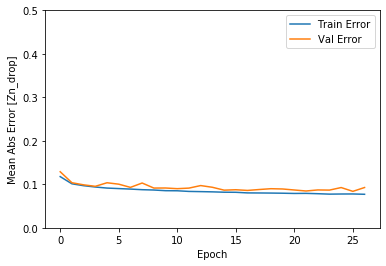

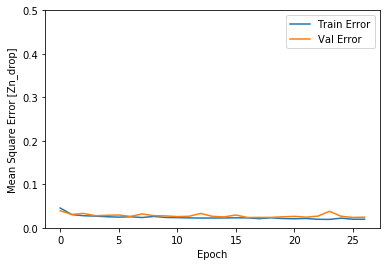

In [49]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [Zn_drop]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],
            label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
            label= 'Val Error')
    plt.legend()
    plt.ylim([0, .5])
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [Zn_drop]')
    plt.plot(hist['epoch'], hist['mean_squared_error'],
            label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'],
            label= 'Val Error')
    plt.legend()
    plt.ylim([0, .5])
    
plot_history(history)

#### Dealing with overfitting

###### Early stopping


...................................

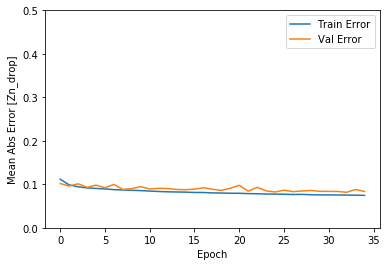

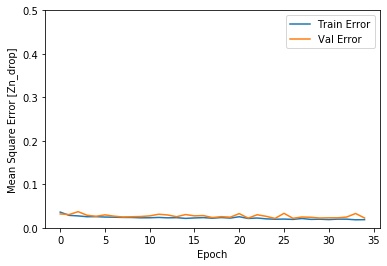

In [50]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                   validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [51]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

5413/5413 - 0s - loss: 0.0204 - mean_absolute_error: 0.0813 - mean_squared_error: 0.0204
Testing set Mean Abs Error:  0.08 MPG


#### Make predictions

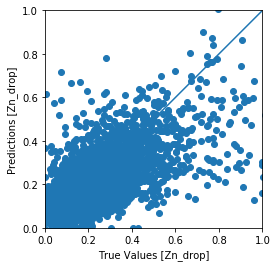

In [52]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Zn_drop]')
plt.ylabel('Predictions [Zn_drop]')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


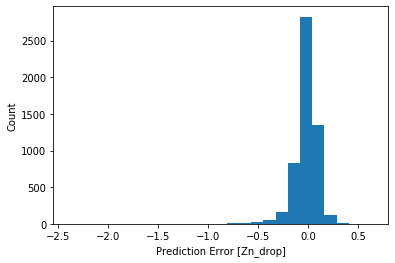

In [53]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Zn_drop]")
_ = plt.ylabel("Count")